In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import os

import plaidml.keras
plaidml.keras.install_backend()

from keras import models, layers

In [2]:
base_dir = 'C:\\Users\\Jastor\\Desktop\\MY ML\\Practise\\Deep Learning\\Convulutional Neural Network Layers\\cats_and_dog_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')

In [3]:
# Retrieving data in the form batches
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale = 1./255, 
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              fill_mode='nearest',
                              horizontal_flip=True)
test_gen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_set = train_gen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')
validation_set = test_gen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Lets visualize how the images are augmented

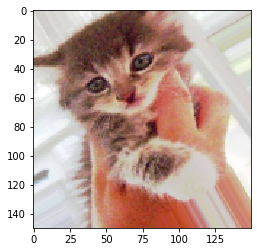

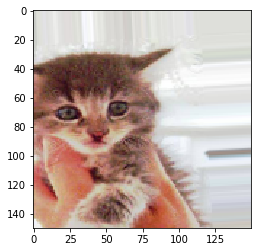

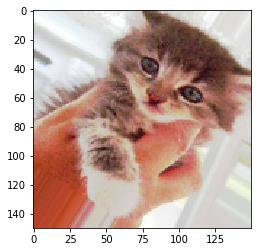

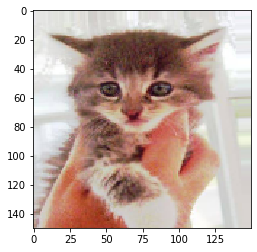

In [5]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_gen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplt = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Now we prepare the network for this classification problem

In [16]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(64, (3, 3), activation = "relu"))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(128, (3, 3), activation = "relu"))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(128, (3, 3), activation = "relu"))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten())
network.add(layers.Dropout(0.5))

network.add(layers.Dense(512, activation = "relu"))
network.add(layers.Dense(1, activation = "sigmoid"))

In [17]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [18]:
from keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = network.fit_generator(train_set, steps_per_epoch=len(train_set), epochs = 50, validation_data = validation_set, validation_steps=len(validation_set))

Epoch 1/50


INFO:plaidml:Analyzing Ops: 84 of 255 operations complete


60/63 [===========================>..] - ETA: 1s - loss: 0.6935 - acc: 0.5198

INFO:plaidml:Analyzing Ops: 81 of 255 operations complete


63/63 [==============================] - 48s 759ms/step - loss: 0.6935 - acc: 0.5199 - val_loss: 0.6869 - val_acc: 0.5870
Epoch 2/50
63/63 [==============================] - 28s 442ms/step - loss: 0.6908 - acc: 0.5303 - val_loss: 0.6781 - val_acc: 0.5900
Epoch 3/50
63/63 [==============================] - 28s 443ms/step - loss: 0.6785 - acc: 0.5853 - val_loss: 0.6600 - val_acc: 0.6010
Epoch 4/50
63/63 [==============================] - 28s 445ms/step - loss: 0.6743 - acc: 0.5759 - val_loss: 0.7002 - val_acc: 0.5330
Epoch 5/50
63/63 [==============================] - 28s 445ms/step - loss: 0.6651 - acc: 0.5942 - val_loss: 0.6452 - val_acc: 0.6170
Epoch 6/50
63/63 [==============================] - 28s 444ms/step - loss: 0.6518 - acc: 0.6121 - val_loss: 0.6378 - val_acc: 0.6300
Epoch 7/50
63/63 [==============================] - 28s 447ms/step - loss: 0.6480 - acc: 0.6240 - val_loss: 0.6395 - val_acc: 0.6330
Epoch 8/50
63/63 [==============================] - 28s 444ms/step - loss: 0.636

In [20]:
def show_loss(hist, epochs = 5):
    loss = hist['loss']
    val_loss = hist['val_loss']
    epoch = range(1, epochs+1)
    plt.plot(epoch, loss, 'bo', label = "Training Loss")
    plt.plot(epoch, val_loss, 'b', label = "Validation Loss")
    plt.show()
    
def show_accuracy(hist, epochs = 5):
    acc = hist['acc']
    val_acc = hist['val_acc']
    epoch = range(1, epochs+1)
    plt.plot(epoch, acc, 'bo', label = "Training Accuracy")
    plt.plot(epoch, val_acc, 'b', label = "Validation Accuracy")
    plt.show()

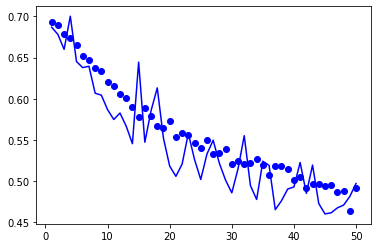

In [21]:
show_loss(history.history, epochs = 50)

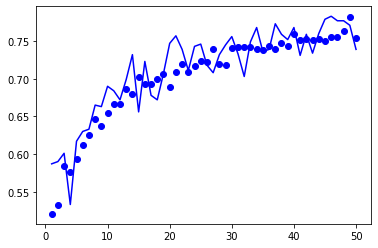

In [22]:
show_accuracy(history.history, epochs = 50)